## FX Carry Strategy in Pyhton

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import my_risk_kit as mrk 

/Users/stefanogrillini/Documents/GitHub/FXcarry/my_risk_kit.py:46: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if filetype is "returns":
/Users/stefanogrillini/Documents/GitHub/FXcarry/my_risk_kit.py:49: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "nfirms":
/Users/stefanogrillini/Documents/GitHub/FXcarry/my_risk_kit.py:52: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "size":


In [2]:
# create FRED ticker lists containing the exchange rates and interest rates of:
# the Euro area, China, Japan, Canada, the UK, Australia, Switzerland, Sweden, Norway, New Zealand and Denmark
list1=["EXUSEU", "EXCHUS", "EXJPUS", "EXCAUS", "EXUSUK", "EXUSAL", "EXSZUS", "EXSDUS", "EXNOUS", "EXUSNZ", "EXDNUS"]
list2=["IR3TIB01EZM156N", "IR3TIB01CNM156N", "IR3TIB01JPM156N", "IR3TIB01CAM156N", "IR3TIB01GBM156N", "IR3TIB01AUM156N","IR3TIB01CHM156N","IR3TIB01SEM156N"
    ,"IR3TIB01NOM156N","IR3TIB01NZM156N","IR3TIB01DKM156N"]

# retrieve exchange rates
exch_rets=pdr.get_data_fred(list1,start="2001-11")
# standardize each currency to currency/USD
exch_rets.loc[:,["EXUSEU", "EXUSUK", "EXUSAL", "EXUSNZ"]]=1/exch_rets.loc[:,["EXUSEU", "EXUSUK", "EXUSAL", "EXUSNZ"]]
exch_rets=exch_rets.rename(columns={"EXUSEU": "EUR","EXCHUS": "CNY","EXJPUS": "JPY","EXCAUS": "CAD","EXUSUK": "GBP" 
                                    ,"EXUSAL": "AUD","EXSZUS": "CHF", "EXSDUS": "SEK","EXNOUS": "NOK","EXUSNZ": "NZD"
                                    ,"EXDNUS": "DKK"})

# standardize each currency to USD/currency (to calculate returns)
exch_rets=1/exch_rets
exch_rets=(exch_rets/exch_rets.shift(1)-1).dropna()

exch_rets.tail().round(3)

,EUR,CNY,JPY,CAD,GBP,AUD,CHF,SEK,NOK,NZD,DKK
DATE,,,,,,,,,,,
2023-04-01,0.023,0.000,0.001,0.015,0.025,0.002,0.030,0.012,0.003,0.000,0.023
2023-05-01,-0.009,-0.014,-0.026,-0.002,0.003,-0.007,0.001,-0.011,-0.028,0.001,-0.008
2023-06-01,-0.002,-0.025,-0.030,0.017,0.011,0.011,-0.003,-0.028,0.001,-0.013,-0.002
2023-07-01,0.021,-0.003,0.003,0.006,0.021,0.004,0.032,0.026,0.055,0.016,0.021
2023-08-01,-0.014,-0.009,-0.027,-0.020,-0.015,-0.038,-0.007,-0.030,-0.022,-0.038,-0.014


In [3]:
# retrieve interest rates
rates=pdr.get_data_fred(list2,start="2013-01")
# copy columnnames for indexing
rates.columns=exch_rets.columns
# retrieve US interest rate
benchmark_rate=pdr.get_data_fred("IR3TIB01USM156N",start="2013-01")
# calculate monthly returns
benchmark_rate=benchmark_rate/100/12
rates=rates/100/12
rates.dropna(inplace = True)
rates.tail()

,EUR,CNY,JPY,CAD,GBP,AUD,CHF,SEK,NOK,NZD,DKK
DATE,,,,,,,,,,,
2021-08-01,-0.000456,0.002383,-0.000060,0.000177,0.000058,0.000008,-0.000642,-0.000135,0.000350,0.000450,-0.000175
2021-09-01,-0.000454,0.002308,-0.000060,0.000185,0.000058,0.000008,-0.000635,-0.000142,0.000558,0.000475,-0.000179
2021-10-01,-0.000458,0.002267,-0.000060,0.000192,0.000133,0.000033,-0.000642,-0.000178,0.000617,0.000583,-0.000230
2021-11-01,-0.000473,0.002450,-0.000060,0.000216,0.000108,0.000033,-0.000653,-0.000289,0.000692,0.000692,-0.000229
2021-12-01,-0.000485,0.002567,-0.000041,0.000225,0.000133,0.000050,-0.000628,-0.000321,0.000850,0.000758,-0.000227


In [4]:
ranked_rates = rates.rank(1, ascending=True)
ranked_rates.tail()

,EUR,CNY,JPY,CAD,GBP,AUD,CHF,SEK,NOK,NZD,DKK
DATE,,,,,,,,,,,
2021-08-01,2.0,11.0,5.0,8.0,7.0,6.0,1.0,4.0,9.0,10.0,3.0
2021-09-01,2.0,11.0,5.0,8.0,7.0,6.0,1.0,4.0,10.0,9.0,3.0
2021-10-01,2.0,11.0,5.0,8.0,7.0,6.0,1.0,4.0,10.0,9.0,3.0
2021-11-01,2.0,11.0,5.0,8.0,7.0,6.0,1.0,3.0,9.5,9.5,4.0
2021-12-01,2.0,11.0,5.0,8.0,7.0,6.0,1.0,3.0,10.0,9.0,4.0


In [5]:
exch_rets = exch_rets.loc[exch_rets.index.intersection(rates.index)]
exch_rets.tail()

,EUR,CNY,JPY,CAD,GBP,AUD,CHF,SEK,NOK,NZD,DKK
DATE,,,,,,,,,,,
2021-08-01,-0.004568,-0.000077,0.003292,-0.005477,-0.000797,-0.015235,0.002952,-0.006118,-0.006193,-0.000286,-0.004557
2021-09-01,-0.000170,0.003175,-0.002799,-0.005682,-0.004711,0.001095,-0.008778,0.004014,0.021933,0.010603,-0.000111
2021-10-01,-0.014025,0.006093,-0.026171,0.019061,-0.002258,0.013676,0.000108,-0.002124,0.023996,0.001560,-0.014470
2021-11-01,-0.015862,0.004430,-0.007401,-0.010583,-0.017371,-0.014166,0.001520,-0.016039,-0.032330,-0.006370,-0.015670
2021-12-01,-0.010074,0.003077,0.001160,-0.018203,-0.011884,-0.020802,0.000326,-0.031465,-0.027079,-0.033196,-0.009953


In [6]:
rates = rates.reset_index()
rates_long = pd.melt(rates, id_vars='DATE', value_vars=["EUR", "CNY", "JPY", "CAD", "GBP", "AUD", "CHF", "SEK", "NOK", "NZD", "DKK"])
exch_rets = exch_rets.reset_index()
exch_rets_long = pd.melt(exch_rets, id_vars='DATE', value_vars=["EUR", "CNY", "JPY", "CAD", "GBP", "AUD", "CHF", "SEK", "NOK", "NZD", "DKK"])
rates_long.head()

,DATE,variable,value
0,2013-01-01,EUR,0.000171
1,2013-02-01,EUR,0.000186
2,2013-03-01,EUR,0.000172
3,2013-04-01,EUR,0.000174
4,2013-05-01,EUR,0.000168


In [7]:
rates_long.rename(columns = {"DATE": "date", "variable": "currency", "value": "rate"}, inplace = True)
exch_rets_long.rename(columns = {"DATE": "date", "variable": "currency", "value": "fx"}, inplace = True)

In [8]:
df_long = rates_long.merge(exch_rets_long, how = 'inner', on = ['date', 'currency'])
df_long.head()

,date,currency,rate,fx
0,2013-01-01,EUR,0.000171,0.014102
1,2013-02-01,EUR,0.000186,0.003232
2,2013-03-01,EUR,0.000172,-0.029520
3,2013-04-01,EUR,0.000174,0.005559
4,2013-05-01,EUR,0.000168,-0.003225


In [9]:
df_long["rank"] = df_long.groupby('date')['rate'].rank(ascending=True)
df_long.head()

,date,currency,rate,fx,rank
0,2013-01-01,EUR,0.000171,0.014102,2.0
1,2013-02-01,EUR,0.000186,0.003232,2.0
2,2013-03-01,EUR,0.000172,-0.029520,2.0
3,2013-04-01,EUR,0.000174,0.005559,2.0
4,2013-05-01,EUR,0.000168,-0.003225,2.0


In [27]:
grouped_df = df_long.groupby('date')
long_portfolio = pd.Series(dtype=object)
short_portfolio = pd.Series(dtype=object)

for date, group in grouped_df:
    ranks = group['rank'].values
    fx_values = group['fx'].values
    
    # Calculate the long portfolio for each currency based on their ranks and weights
    long = (
        0.5 * fx_values[ranks == 11].sum() +
        0.3 * fx_values[ranks == 10].sum() +
        0.2 * fx_values[ranks == 9].sum() 
    )
    short = (
        0.5 * fx_values[ranks == 1].sum() +
        0.3 * fx_values[ranks == 2].sum() +
        0.2 * fx_values[ranks == 3].sum() 
    )
    
    
    # Append the long portfolio for the current date to the overall long_portfolio Series
    long_portfolio.at[date] = long
    short_portfolio.at[date] = short

In [28]:
long_portfolio = long_portfolio.to_frame(name = 'long')
long_portfolio

,long
2013-01-01,0.003307
2013-02-01,-0.005937
2013-03-01,-0.000031
2013-04-01,0.008091
2013-05-01,-0.015126
...,...
2021-08-01,-0.001363
2021-09-01,0.010288
2021-10-01,0.010557
2021-11-01,0.002215


In [29]:
short_portfolio = short_portfolio.to_frame(name = 'short')

In [34]:
portfolio = long_portfolio['long']-short_portfolio['short']
portfolio = portfolio.to_frame(name = 'carry')
portfolio.head()

,carry
2013-01-01,0.012043
2013-02-01,0.000380
2013-03-01,0.025973
2013-04-01,0.007198
2013-05-01,0.002097


In [35]:
portfolio = pd.DataFrame(portfolio)
portfolio.index.rename('date', inplace = True)
portfolio.head()

,carry
date,
2013-01-01,0.012043
2013-02-01,0.000380
2013-03-01,0.025973
2013-04-01,0.007198
2013-05-01,0.002097


<AxesSubplot:xlabel='date'>

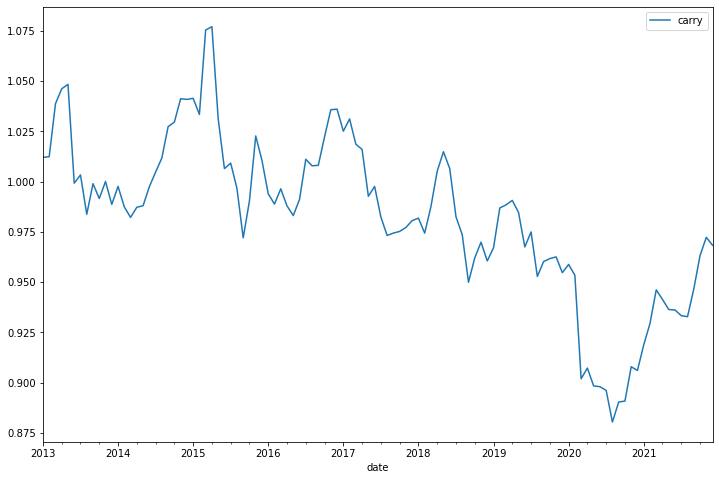

In [36]:
(1+portfolio).cumprod().plot(figsize = (12, 8))

In [37]:
mrk.summary_stats(portfolio)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
carry,-0.00357,0.050516,-0.733934,5.134959,0.026323,0.036069,-0.646808,-0.182632
